# Model Training

Here We will further work on our Dataset and make it ready for model Training.

### Procedure:
- Correlation analysis(heatmap/statsmodel VIF)
- Splitting The Dataset
- Data/scaling and Normalization
- Model Training (Regression)
- Model Evaluation and Hyperparameter tuning
- Model Selection


In [24]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#machine learning preprocessing techniques
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Machine learning libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [25]:
## Read the Cleaned Dataset
df = pd.read_csv('Cleaned_dataset.csv')
df.head()

,fare_amount,passenger_count,time_of_day,distance,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,7.5,1,Evening,1.68,19,3,5,2015
1,7.7,1,Evening,2.45,20,4,7,2009
2,12.9,1,Night,5.04,21,0,8,2009
3,5.3,3,Morning,1.66,8,4,6,2009
4,16.0,5,Evening,4.48,17,3,8,2014


## Correlation analysis


<function matplotlib.pyplot.show(close=None, block=None)>

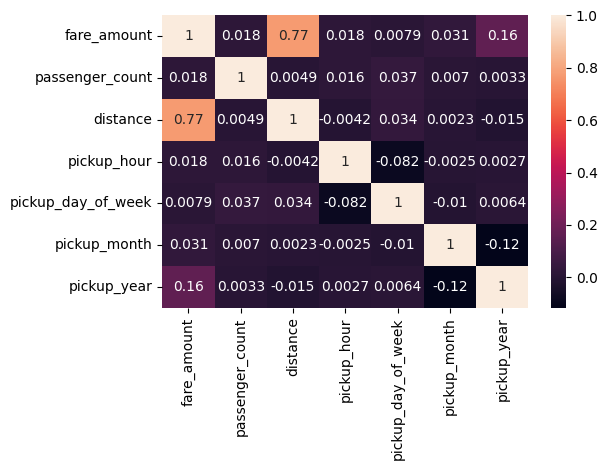

In [26]:
sns.heatmap(df[df.select_dtypes(exclude='object').columns].corr(), annot=True)
plt.tight_layout()
plt.show

## Insights

- Distance is the strongest predictor of fare amount. This emphasizes that distance is the primary driver for fare pricing.
- Temporal features (hour, day, year) show little to no influence on fare directly, but pickup year could suggest incremental fare increases over time.
- Passenger count has minimal impact on fare, indicating that the number of riders doesn’t heavily influence pricing.

## Splitting the dataset

we will split the dataset into train and test part. This helps us to evaluate the model.

In [27]:
# Independent and Dependent variable
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']

# utilizing train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)

print(f'The dimension of the  training set: {X_train.shape}')
print(f'The dimension of the  testing set: {X_test.shape}')
print(f'The dimension of the original set: {df.shape}')

The dimension of the  training set: (130156, 7)
The dimension of the  testing set: (32539, 7)
The dimension of the original set: (162695, 8)


## Data Normalization & Transforming categorical features

Data Normalization: It helps in scaling all the feature to a similar range that helps in effeciant learning of the model

Transformation: it helps transforming categorical features to numerical features that helps the model to learn its significance.

In [28]:
# utilizing columntransformer tobuild a pipeline
cat_features = ['time_of_day']
num_features = X.select_dtypes(exclude='object').columns

oh_transformer = OneHotEncoder()
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(

    [

        ('OneHot Encoding', oh_transformer, cat_features),
        ('Standard Scaling', num_transformer, num_features)
    ], remainder='passthrough'
)


In [29]:
# fit transforming X_train
X_train = preprocessor.fit_transform(X_train)

# transform X_test (not fit_transform in testing set to prevent data leakage)
X_test = preprocessor.transform(X_test)

In [30]:
X_train

array([[ 0.        ,  1.        ,  0.        , ..., -1.04709646,
        -0.07352588,  0.70059523],
       [ 0.        ,  0.        ,  1.        , ..., -1.5622401 ,
        -1.52433606, -0.91336627],
       [ 0.        ,  1.        ,  0.        , ..., -1.04709646,
        -0.36368791, -0.3753791 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.52862175,
         1.08712227, -0.3753791 ],
       [ 0.        ,  0.        ,  1.        , ..., -1.04709646,
        -1.52433606, -0.3753791 ],
       [ 0.        ,  0.        ,  1.        , ...,  0.49833447,
         0.79696023,  0.16260806]], shape=(130156, 10))

In [31]:
X_test

array([[ 0.        ,  0.        ,  0.        , ...,  1.52862175,
         1.3772843 , -0.91336627],
       [ 0.        ,  0.        ,  0.        , ...,  1.52862175,
         1.08712227, -0.91336627],
       [ 0.        ,  0.        ,  0.        , ..., -0.53195282,
        -0.65384995,  0.16260806],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.52862175,
         1.08712227, -0.3753791 ],
       [ 0.        ,  0.        ,  1.        , ..., -0.01680918,
         0.21663616, -1.45135344],
       [ 0.        ,  0.        ,  1.        , ..., -1.04709646,
         0.5067982 ,  0.70059523]], shape=(32539, 10))